# `Graph Mining Lab02 (230913) - Practice`




#✅ 실습확인 파일 제출안내
- 내용 : 확인문제 템플릿(ipynb) 및 답안작성 파일(py) 다운받아, 템플릿을 바탕으로 문제 풀이 후, 작성코드를 답안작성 파일에 옮겨 제출
- 파일명 (py만 제출): lab02-학번+이름.py
- 제출 : 아이캠퍼스 Lab02에 제출
- 기한: 수업시간 끝날 때까지 (19:15)

# `[Environment Setting]`

In [1]:
# install dgl
# https://www.dgl.ai/pages/start.html

!pip install -q dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 985.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import torch
import dgl
import networkx as nx

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


---

# `[문제-1] DGL 라이브러리를 이용해 다음에 답하시오.`

**1-1. 다음 그래프를 출력하는 코드를 작성하시오.**

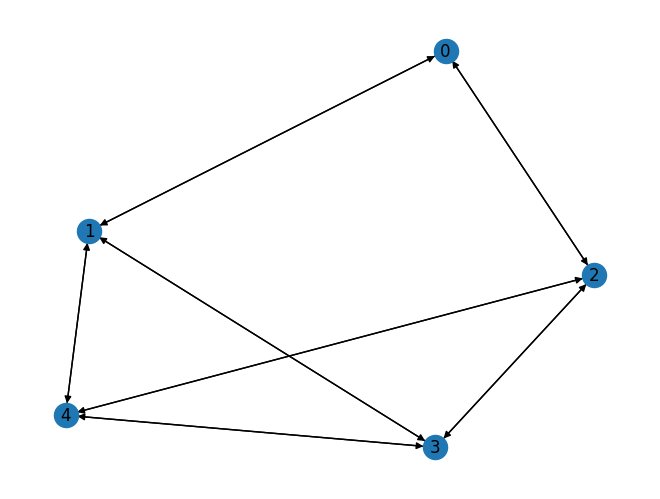

In [10]:
### Write your Code ###
u, v = torch.tensor([0, 0, 1, 1, 2, 2, 3]), torch.tensor([1, 2, 3, 4, 4, 3, 4])
g = dgl.graph((u, v))
g = dgl.to_bidirected(g)

Problem 01: # of in_degrees:  tensor([2, 3, 3, 3, 3])


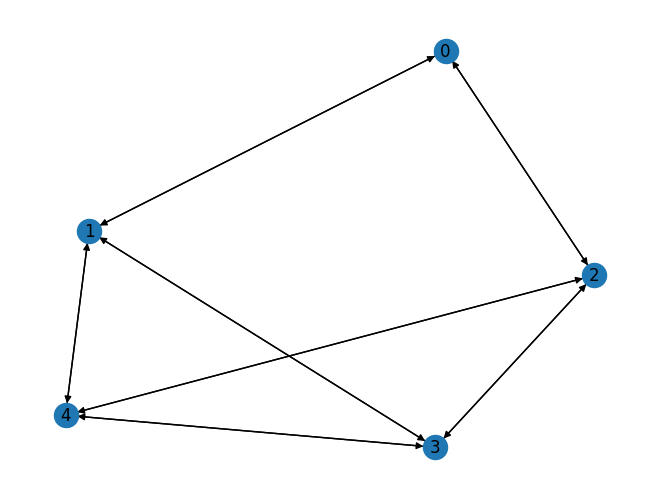

In [11]:
### Validation Code ###
seed = 53
nx_G = dgl.to_networkx(g)
pos = nx.spring_layout(nx_G, seed=seed)
nx.draw(nx_G, pos=pos, with_labels=True)
print("Problem 01: # of in_degrees: ", g.in_degrees())

---

# `[문제2] DGL 라이브러리를 활용해 다음과 같은 이분 그래프를 만들고 시각화하시오.`

**2-1. 다음과 같은 이분 그래프를 정의하시오.**
- graph_data = ('user', 'retweet', 'post')
- edge_list (user_num, post_num) = (0, 1), (0, 2), (1, 0), (1, 2), (2, 1), (2, 2), (2, 3), (2, 4)

In [13]:
### Write your Code ###
graph_data = {
   ('user', 'retweet', 'post'): (torch.tensor([0, 0, 1, 1, 2, 2, 2, 2]),
                               torch.tensor([1, 2, 0, 2, 1, 2, 3, 4]))
}
g = dgl.heterograph(graph_data)

In [14]:
### Validation Code ###
print("Problem 2-1: bipartite-graph:\n", g)

Problem 2-1: bipartite-graph:
 Graph(num_nodes={'post': 5, 'user': 3},
      num_edges={('user', 'retweet', 'post'): 8},
      metagraph=[('user', 'post', 'retweet')])


**2-2. 정의한 이분 그래프를 시각화 하시오.**
- 이분 그래프의 속성이 잘 드러나도록 노드 인덱스를 적절히 지정하세요.

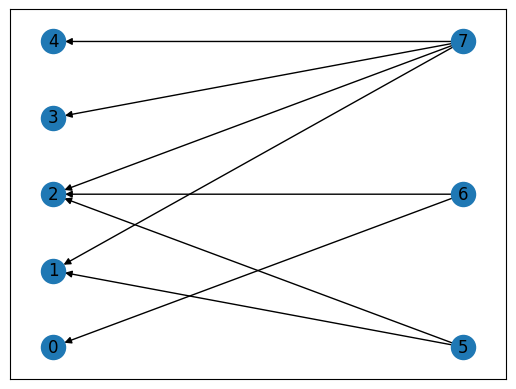

In [17]:
### Write your Code ###
g_hete2homo = dgl.to_homogeneous(g)
node_index = [0,1,2,3,4]
nx_hete2homo = dgl.to_networkx(g_hete2homo)
nx.draw_networkx(
    nx_hete2homo,
    pos = nx.drawing.layout.bipartite_layout(nx_hete2homo, node_index))

In [18]:
### Validation Code ###
print("Problem 2-2: node_index: ", node_index)

Problem 2-2: node_index:  [0, 1, 2, 3, 4]


---

## 수고하셨습니다.

---